In [42]:
!pip install 'sagemaker[local]' --upgrade

In [43]:
!sudo service docker restart

Stopping docker: [  OK  ]
Starting docker:	.[  OK  ]


In [44]:
!docker rmi -f $(docker images -a -q)

Untagged: 763104351884.dkr.ecr.us-east-1.amazonaws.com/pytorch-inference:1.5.0-cpu-py3
Untagged: 763104351884.dkr.ecr.us-east-1.amazonaws.com/pytorch-inference@sha256:73cd1c5ef42b582635dbb7c98c6355dfd39efba3f6c56bd32a9f05e11e824bbd
Deleted: sha256:f4ddd4b0f4cf481ffe41c6101bff2a8b62a8a1aa8a60deb1b723a8d19e3aaf6c
Untagged: 763104351884.dkr.ecr.us-east-1.amazonaws.com/pytorch-training:1.5.0-cpu-py3
Untagged: 763104351884.dkr.ecr.us-east-1.amazonaws.com/pytorch-training@sha256:2bb61fb08ad07b5993715f125e2cb7b0434ba665fdc9c540a471efede65e14b9
Deleted: sha256:e77085e0f8445478354c1b396cabb08311081f106764ee1d19ae52a5ab876ecb


In [45]:
s3_bucket = 'sagemaker-cookbook-bucket'
prefix = 'chapter03'

In [46]:
train_s3 = \
f"s3://{s3_bucket}/{prefix}/synthetic/training_data.csv" 

In [47]:
from sagemaker.inputs import TrainingInput
    
train_input = TrainingInput(train_s3, content_type="text/csv")

In [48]:
import os
import sagemaker
from sagemaker import get_execution_role
from sagemaker.local import LocalSession

sagemaker_session = LocalSession()
sagemaker_session.config = {'local': {'local_code': True}}
role = get_execution_role()

In [49]:
from sagemaker.pytorch import PyTorch

estimator = PyTorch(entry_point='pytorch_training.py',
                    session=sagemaker_session,
                    role=role,
                    instance_count=1,
                    instance_type='local',
                    framework_version='1.5.0',
                    py_version='py3')

In [50]:
estimator.fit({'train': train_input})

Creating v6s2y4mw9u-algo-1-btryg ... 
Creating v6s2y4mw9u-algo-1-btryg ... done
Attaching to v6s2y4mw9u-algo-1-btryg
v6s2y4mw9u-algo-1-btryg | 2021-05-16 21:47:19,250 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
v6s2y4mw9u-algo-1-btryg | 2021-05-16 21:47:19,264 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
v6s2y4mw9u-algo-1-btryg | 2021-05-16 21:47:19,276 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
v6s2y4mw9u-algo-1-btryg | 2021-05-16 21:47:19,279 sagemaker_pytorch_container.training INFO     Invoking user training script.
v6s2y4mw9u-algo-1-btryg | 2021-05-16 21:47:19,425 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
v6s2y4mw9u-algo-1-btryg | 2021-05-16 21:47:19,440 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
v6s2y4mw9u-algo-1-btryg | 2021-05-16 21:47:19,454 sagemaker-training-toolkit 

v6s2y4mw9u-algo-1-btryg | Iteration: 110 	| Loss: 23875532.0
v6s2y4mw9u-algo-1-btryg | Iteration: 120 	| Loss: 23650586.0
v6s2y4mw9u-algo-1-btryg | Iteration: 130 	| Loss: 24345954.0
v6s2y4mw9u-algo-1-btryg | Iteration: 140 	| Loss: 24747818.0
v6s2y4mw9u-algo-1-btryg | Iteration: 150 	| Loss: 24158184.0
v6s2y4mw9u-algo-1-btryg | Iteration: 160 	| Loss: 24308222.0
v6s2y4mw9u-algo-1-btryg | Iteration: 170 	| Loss: 24102996.0
v6s2y4mw9u-algo-1-btryg | Iteration: 180 	| Loss: 23911868.0
v6s2y4mw9u-algo-1-btryg | Iteration: 190 	| Loss: 23726084.0
v6s2y4mw9u-algo-1-btryg | Iteration: 200 	| Loss: 23557984.0
v6s2y4mw9u-algo-1-btryg | Iteration: 210 	| Loss: 24245836.0
v6s2y4mw9u-algo-1-btryg | Iteration: 220 	| Loss: 23413326.0
v6s2y4mw9u-algo-1-btryg | Iteration: 230 	| Loss: 24322930.0
v6s2y4mw9u-algo-1-btryg | Iteration: 240 	| Loss: 23222338.0
v6s2y4mw9u-algo-1-btryg | Iteration: 250 	| Loss: 23499848.0
v6s2y4mw9u-algo-1-btryg | Iteration: 260 	| Loss: 23268264.0
v6s2y4mw9u-algo-1-btryg 

v6s2y4mw9u-algo-1-btryg | Iteration: 1280 	| Loss: 2069167.125
v6s2y4mw9u-algo-1-btryg | Iteration: 1290 	| Loss: 1919026.5
v6s2y4mw9u-algo-1-btryg | Iteration: 1300 	| Loss: 2550877.5
v6s2y4mw9u-algo-1-btryg | Iteration: 1310 	| Loss: 1800666.25
v6s2y4mw9u-algo-1-btryg | Iteration: 1320 	| Loss: 2463572.75
v6s2y4mw9u-algo-1-btryg | Iteration: 1330 	| Loss: 2004627.5
v6s2y4mw9u-algo-1-btryg | Iteration: 1340 	| Loss: 1696537.0
v6s2y4mw9u-algo-1-btryg | Iteration: 1350 	| Loss: 1589886.375
v6s2y4mw9u-algo-1-btryg | Iteration: 1360 	| Loss: 2301786.0
v6s2y4mw9u-algo-1-btryg | Iteration: 1370 	| Loss: 2226679.0
v6s2y4mw9u-algo-1-btryg | Iteration: 1380 	| Loss: 1764881.375
v6s2y4mw9u-algo-1-btryg | Iteration: 1390 	| Loss: 2380767.0
v6s2y4mw9u-algo-1-btryg | Iteration: 1400 	| Loss: 1717496.0
v6s2y4mw9u-algo-1-btryg | Iteration: 1410 	| Loss: 1665220.25
v6s2y4mw9u-algo-1-btryg | Iteration: 1420 	| Loss: 2063479.0
v6s2y4mw9u-algo-1-btryg | Iteration: 1430 	| Loss: 2803083.25
v6s2y4mw9u-alg

In [51]:
from sagemaker.pytorch.model import PyTorchModel

pytorch_model = PyTorchModel(model_data=estimator.model_data, 
                             role=role, 
                             entry_point='pytorch_inference.py', 
                             framework_version='1.5.0',
                             py_version="py3")

In [52]:
predictor = pytorch_model.deploy(instance_type='local', 
                                 initial_instance_count=1)

Attaching to nv22uzt586-algo-1-67ov9
nv22uzt586-algo-1-67ov9 | 2021-05-16 21:49:55,443 [INFO ] main com.amazonaws.ml.mms.ModelServer - 
nv22uzt586-algo-1-67ov9 | MMS Home: /opt/conda/lib/python3.6/site-packages
nv22uzt586-algo-1-67ov9 | Current directory: /
nv22uzt586-algo-1-67ov9 | Temp directory: /home/model-server/tmp
nv22uzt586-algo-1-67ov9 | Number of GPUs: 0
nv22uzt586-algo-1-67ov9 | Number of CPUs: 2
nv22uzt586-algo-1-67ov9 | Max heap size: 878 M
nv22uzt586-algo-1-67ov9 | Python executable: /opt/conda/bin/python3.6
nv22uzt586-algo-1-67ov9 | Config file: /etc/sagemaker-mms.properties
nv22uzt586-algo-1-67ov9 | Inference address: http://0.0.0.0:8080
nv22uzt586-algo-1-67ov9 | Management address: http://0.0.0.0:8080
nv22uzt586-algo-1-67ov9 | Model Store: /.sagemaker/mms/models
nv22uzt586-algo-1-67ov9 | Initial Models: ALL
nv22uzt586-algo-1-67ov9 | Log dir: /logs
nv22uzt586-algo-1-67ov9 | Metrics dir: /logs
nv22uzt586-algo-1-67ov9 | Netty threads: 0
nv22uzt586-algo-1-67ov9 | Netty cli

In [53]:
import numpy as np

predictor.predict(np.array([[100], [200]], dtype=np.float32))

nv22uzt586-algo-1-67ov9 | 2021-05-16 21:49:57,533 [INFO ] W-9000-model com.amazonaws.ml.mms.wlm.WorkerThread - Backend response time: 1
nv22uzt586-algo-1-67ov9 | 2021-05-16 21:49:57,534 [INFO ] W-9000-model ACCESS_LOG - /172.18.0.1:54982 "POST /invocations HTTP/1.1" 200 10


array([[227.69871521],
       [386.82015991]])

In [54]:
!mkdir -p tmp

In [55]:
all_s3 = f"s3://{s3_bucket}/{prefix}/synthetic/all_data.csv" 
!aws s3 cp {all_s3} tmp/all_data.csv

download: s3://sagemaker-cookbook-bucket/chapter03/synthetic/all_data.csv to tmp/all_data.csv


In [56]:
import pandas as pd

all_data = pd.read_csv("tmp/all_data.csv", header=None)
x = all_data[[1]].values
y = all_data[[0]].values

In [57]:
from numpy import arange

line_x = arange(-5000, 5000, 10)
line_x

array([-5000, -4990, -4980, -4970, -4960, -4950, -4940, -4930, -4920,
       -4910, -4900, -4890, -4880, -4870, -4860, -4850, -4840, -4830,
       -4820, -4810, -4800, -4790, -4780, -4770, -4760, -4750, -4740,
       -4730, -4720, -4710, -4700, -4690, -4680, -4670, -4660, -4650,
       -4640, -4630, -4620, -4610, -4600, -4590, -4580, -4570, -4560,
       -4550, -4540, -4530, -4520, -4510, -4500, -4490, -4480, -4470,
       -4460, -4450, -4440, -4430, -4420, -4410, -4400, -4390, -4380,
       -4370, -4360, -4350, -4340, -4330, -4320, -4310, -4300, -4290,
       -4280, -4270, -4260, -4250, -4240, -4230, -4220, -4210, -4200,
       -4190, -4180, -4170, -4160, -4150, -4140, -4130, -4120, -4110,
       -4100, -4090, -4080, -4070, -4060, -4050, -4040, -4030, -4020,
       -4010, -4000, -3990, -3980, -3970, -3960, -3950, -3940, -3930,
       -3920, -3910, -3900, -3890, -3880, -3870, -3860, -3850, -3840,
       -3830, -3820, -3810, -3800, -3790, -3780, -3770, -3760, -3750,
       -3740, -3730,

In [58]:
input_data = np.array(line_x.reshape(-1, 1), dtype=np.float32)
result = predictor.predict(input_data)

result

nv22uzt586-algo-1-67ov9 | 2021-05-16 21:49:58,789 [INFO ] W-9000-model com.amazonaws.ml.mms.wlm.WorkerThread - Backend response time: 9
nv22uzt586-algo-1-67ov9 | 2021-05-16 21:49:58,789 [INFO ] W-9000-model ACCESS_LOG - /172.18.0.1:54982 "POST /invocations HTTP/1.1" 200 10


array([[ 1.02461316e+03],
       [ 1.02212274e+03],
       [ 1.01962878e+03],
       [ 1.01677557e+03],
       [ 1.01345319e+03],
       [ 1.00987567e+03],
       [ 1.00624750e+03],
       [ 1.00225098e+03],
       [ 9.97802979e+02],
       [ 9.93195801e+02],
       [ 9.87457764e+02],
       [ 9.81670532e+02],
       [ 9.75475891e+02],
       [ 9.68850159e+02],
       [ 9.61755676e+02],
       [ 9.54395508e+02],
       [ 9.47038757e+02],
       [ 9.39684204e+02],
       [ 9.32331543e+02],
       [ 9.24979980e+02],
       [ 9.16943604e+02],
       [ 9.08822205e+02],
       [ 9.00640991e+02],
       [ 8.92306580e+02],
       [ 8.83872131e+02],
       [ 8.74881165e+02],
       [ 8.65483459e+02],
       [ 8.55370667e+02],
       [ 8.44784058e+02],
       [ 8.34203674e+02],
       [ 8.23499695e+02],
       [ 8.12417725e+02],
       [ 8.00148376e+02],
       [ 7.87173584e+02],
       [ 7.74201294e+02],
       [ 7.60503784e+02],
       [ 7.46591736e+02],
       [ 7.32679382e+02],
       [ 7.1

In [59]:
line_y = result

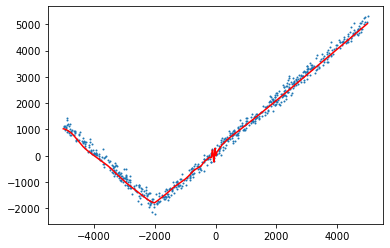

In [60]:
from matplotlib import pyplot
pyplot.plot(line_x, line_y, 'r')
pyplot.scatter(x,y,s=1)
pyplot.show()

In [61]:
predictor.delete_endpoint()

Gracefully stopping... (press Ctrl+C again to force)
